In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.tsa.api as smt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_csv("/content/Social_Network_Ads.csv") 

In [ ]:
data.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
data.dtypes 

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.shape 

(400, 5)

In [ ]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [ ]:
data.isna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

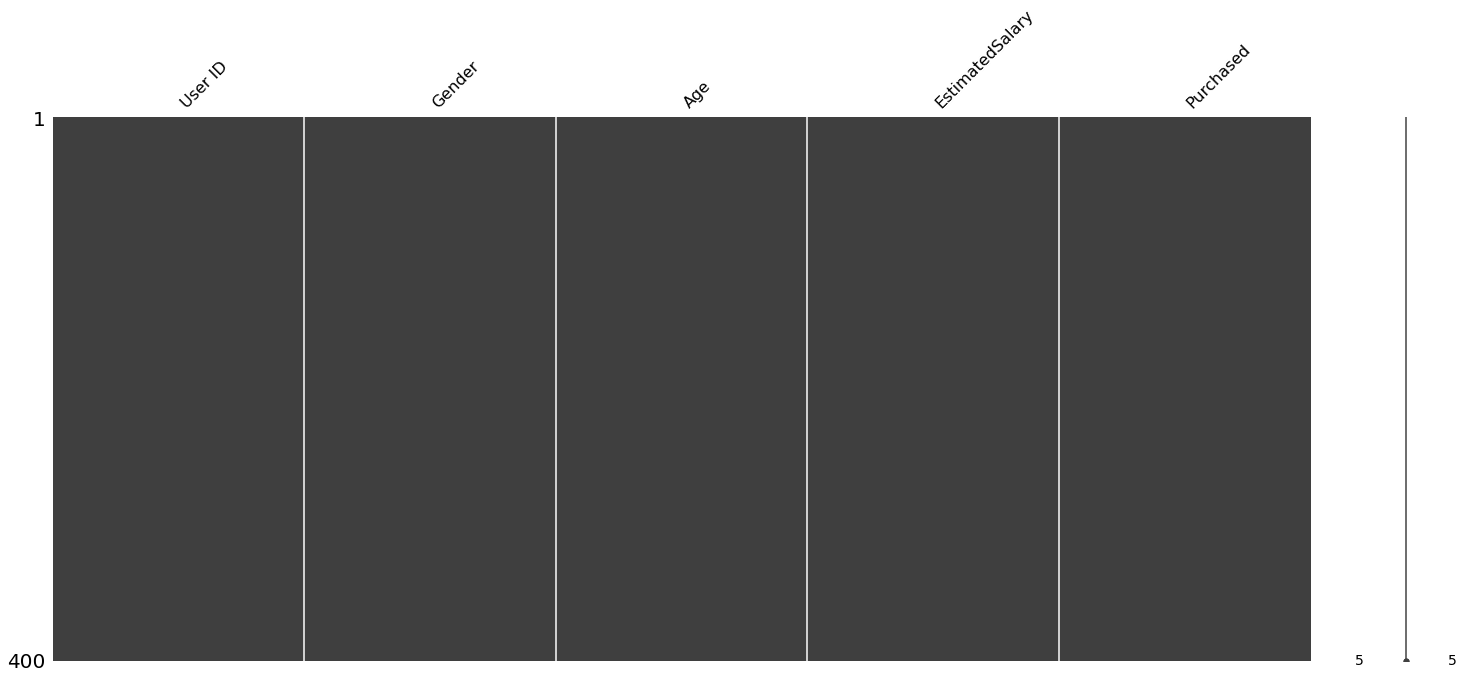

In [ ]:
import missingno as msno 
msno.matrix(data)

In [ ]:
data.loc[data.duplicated()] 

,User ID,Gender,Age,EstimatedSalary,Purchased


In [ ]:
data.describe() 

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Korelasiya 

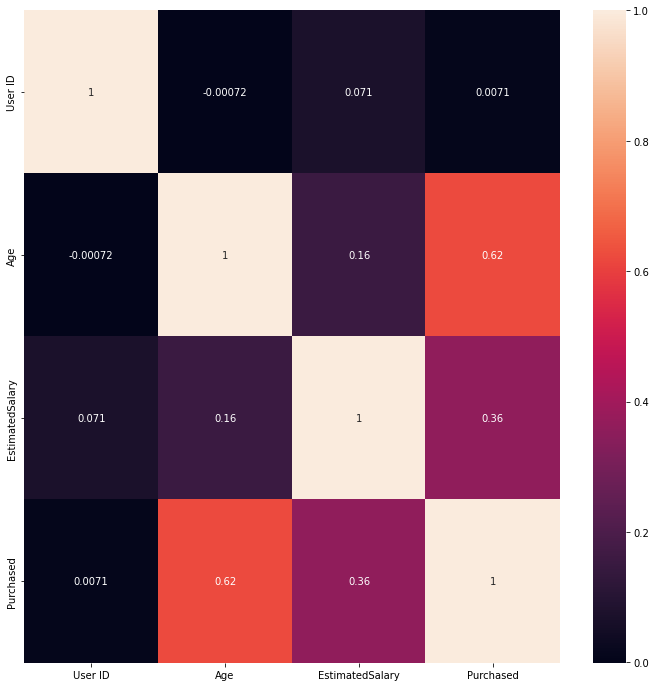

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True);

Durbin Watson Testi

In [ ]:
data_numer=data.select_dtypes(exclude="object")

In [ ]:
for i in data_numer: 
  data_durb=durbin_watson(data_numer[i])
  print(i,data_durb,sep="=")

Age=0.057397145036218955
EstimatedSalary=0.3620885790947028
Purchased=1.013986013986014


<Figure size 1440x720 with 0 Axes>

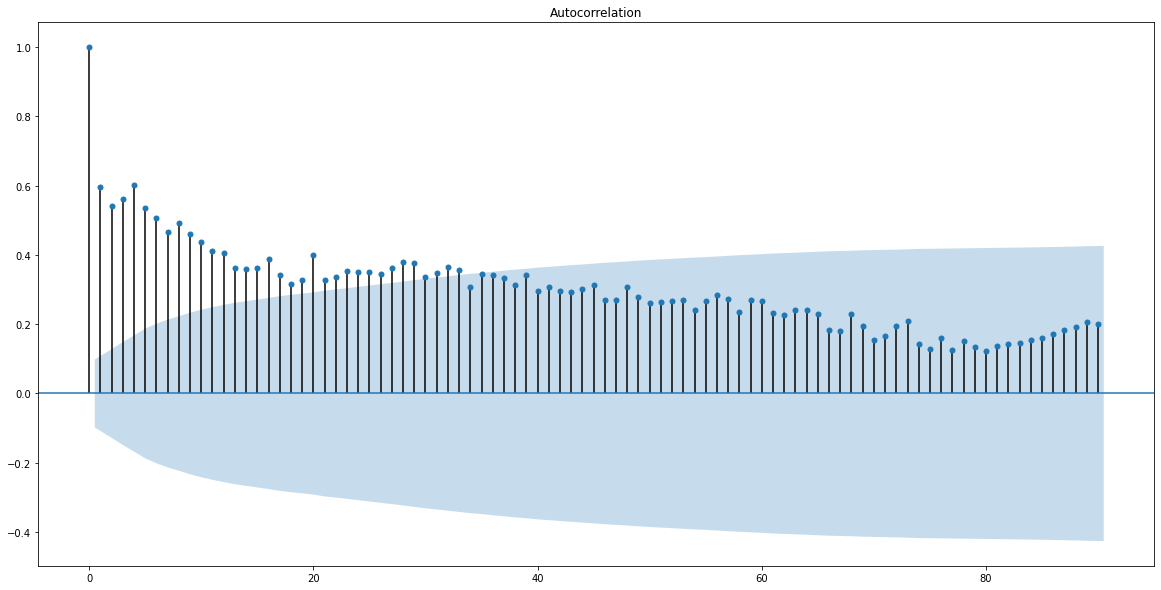

In [ ]:
data_a = data_numer.to_numpy().T[0] 
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(data_a, lags=90)
plt.show()

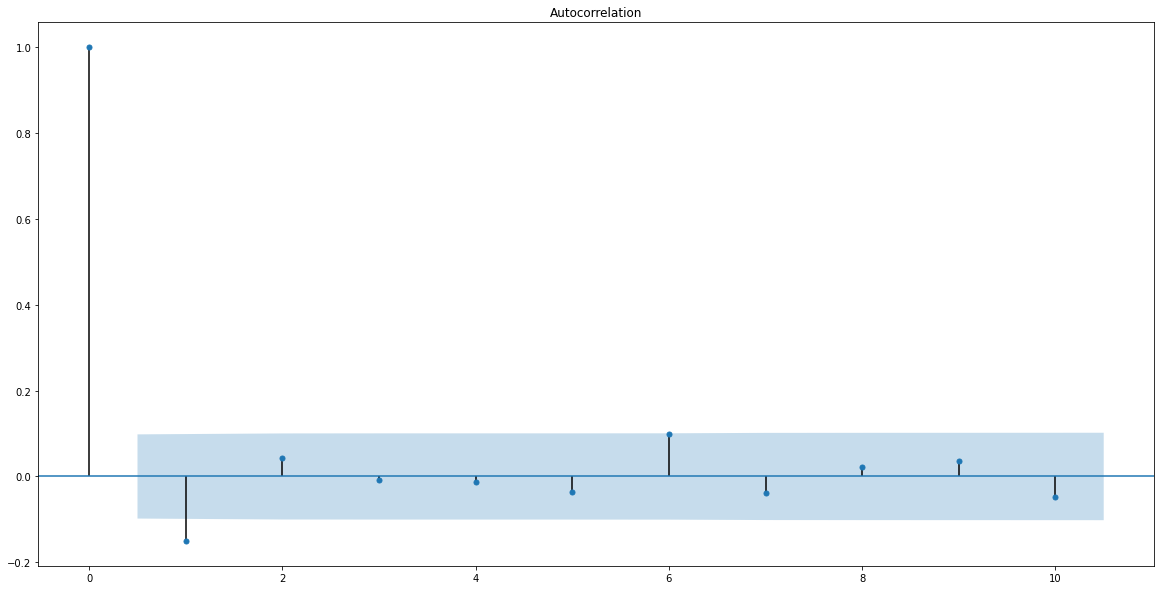

In [ ]:
acf = smt.graphics.plot_acf(data_a, lags=10 , alpha=0.05)
acf.show()

In [ ]:
data=data.drop("User ID",axis=1)
data_numer=data_numer.drop("User ID",axis=1)

KeyError: ignored

In [ ]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1869de890>,
      dtype=object)

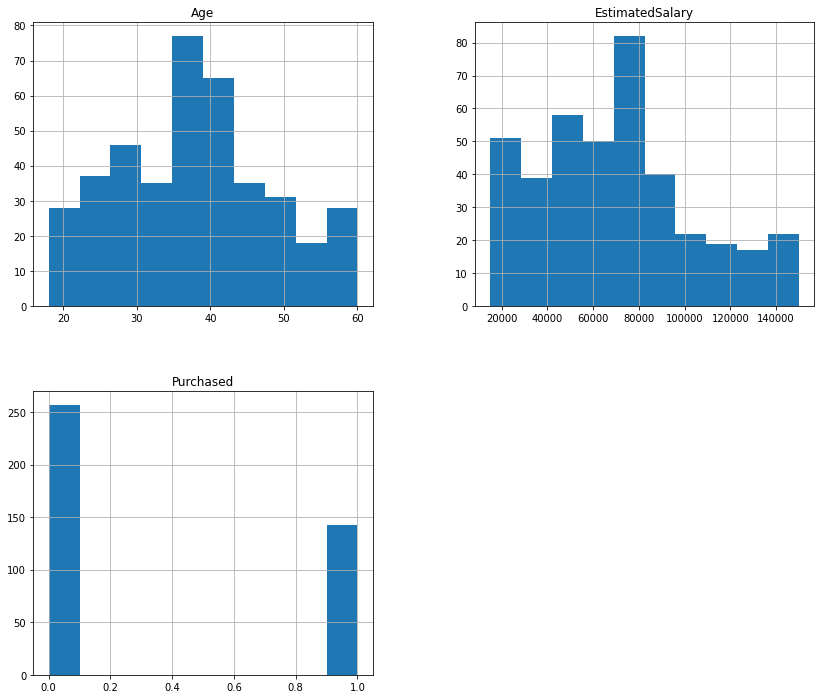

In [ ]:
data.hist(figsize = (14,12)) # Historgram qrafikin cixartmaq ucun data.hist funksiyasi isdifade olunur

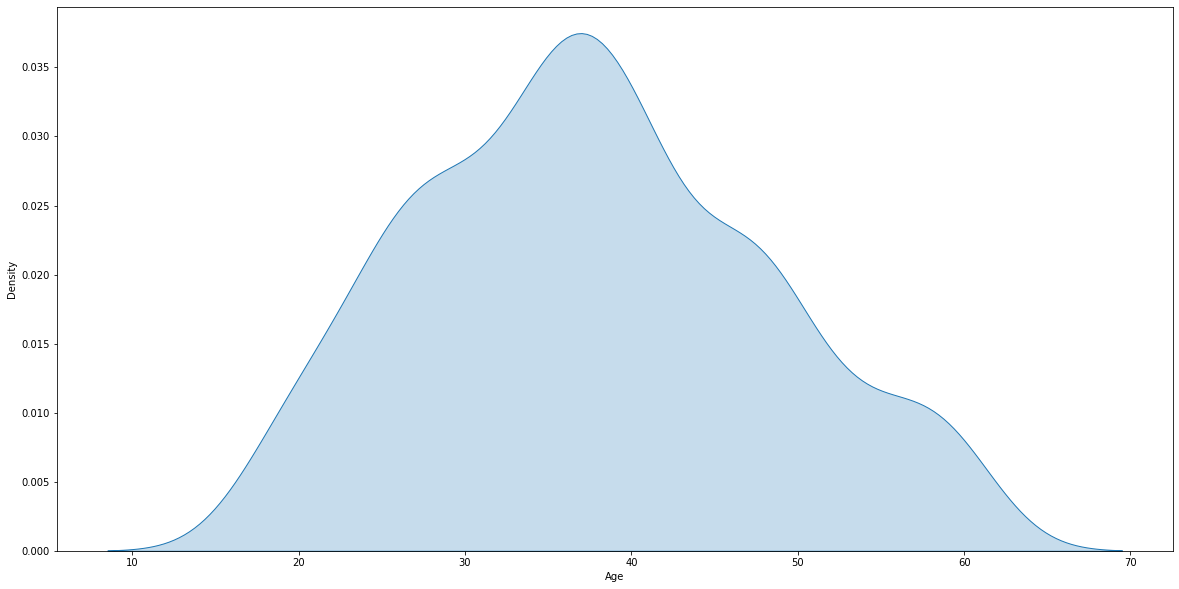

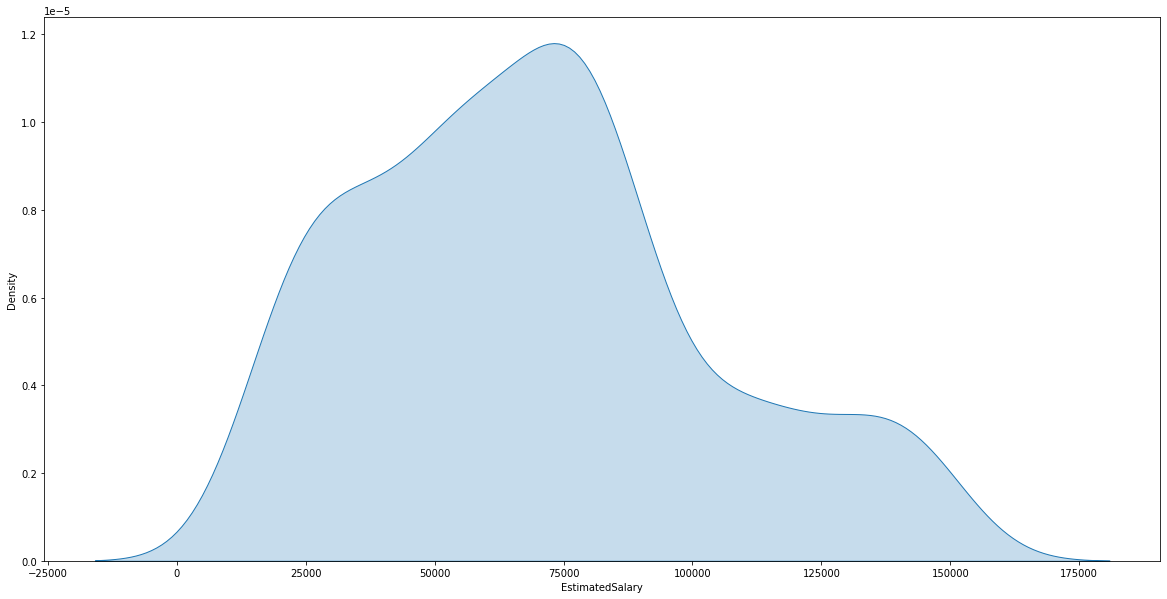

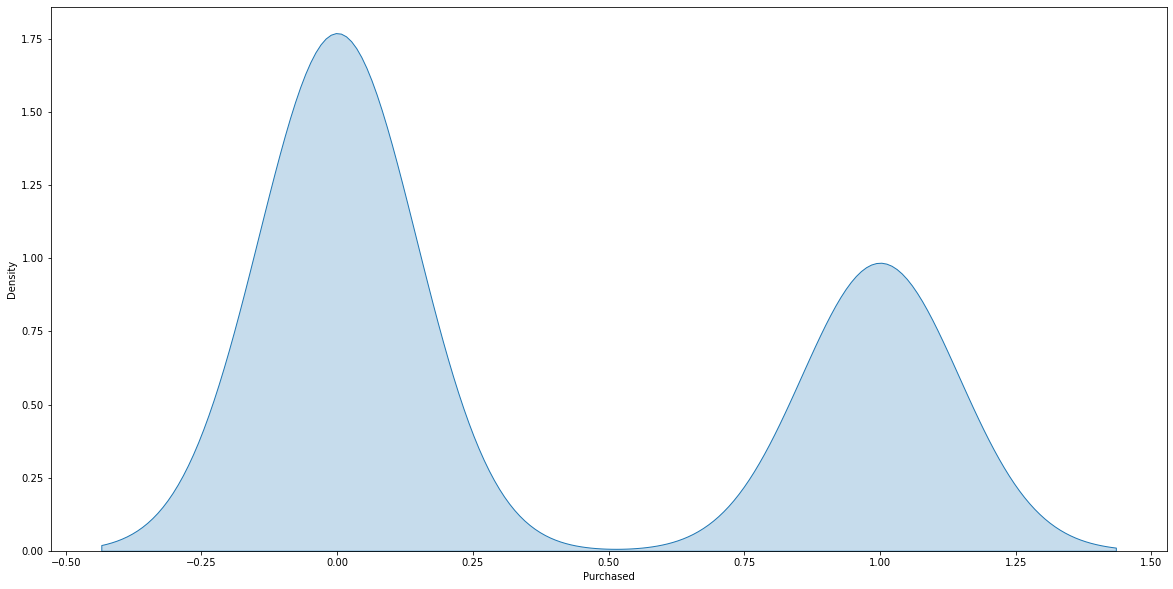

In [ ]:
for i, col in enumerate(data_numer.columns):
  plt.figure(i)
  sns.kdeplot(data_numer[col], shade=True); # Datanın sütunlarının saçılması(distribution) qrafiki

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

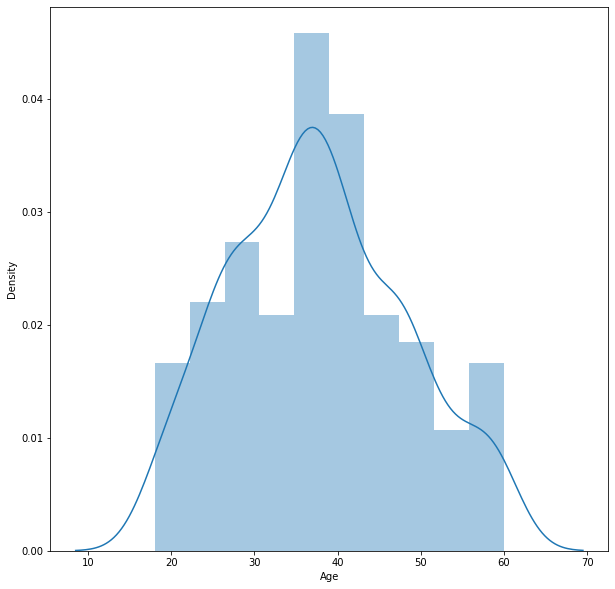

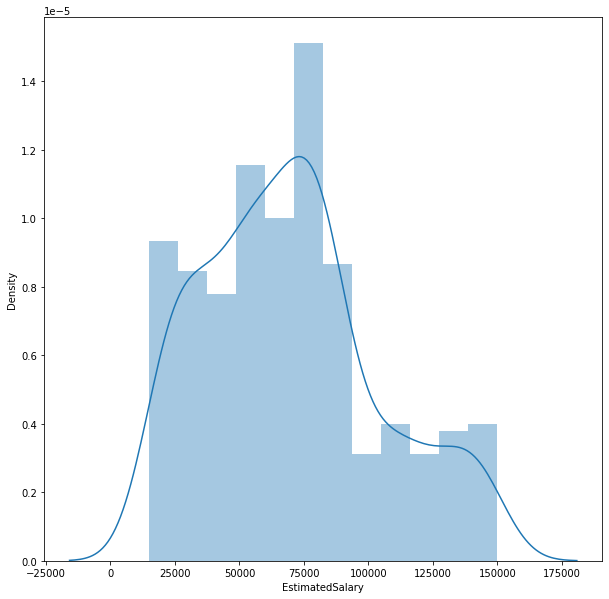

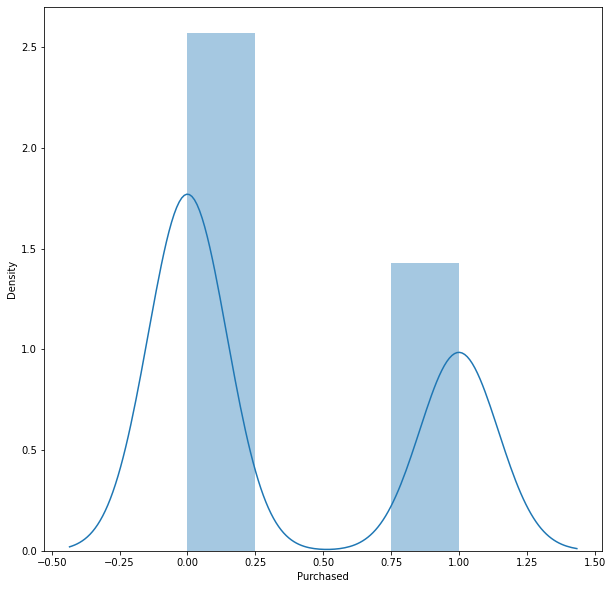

In [ ]:
for a in data_numer:
  plt.figure(figsize=(10,10))
  sns.distplot(data_numer[a]) 

In [ ]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

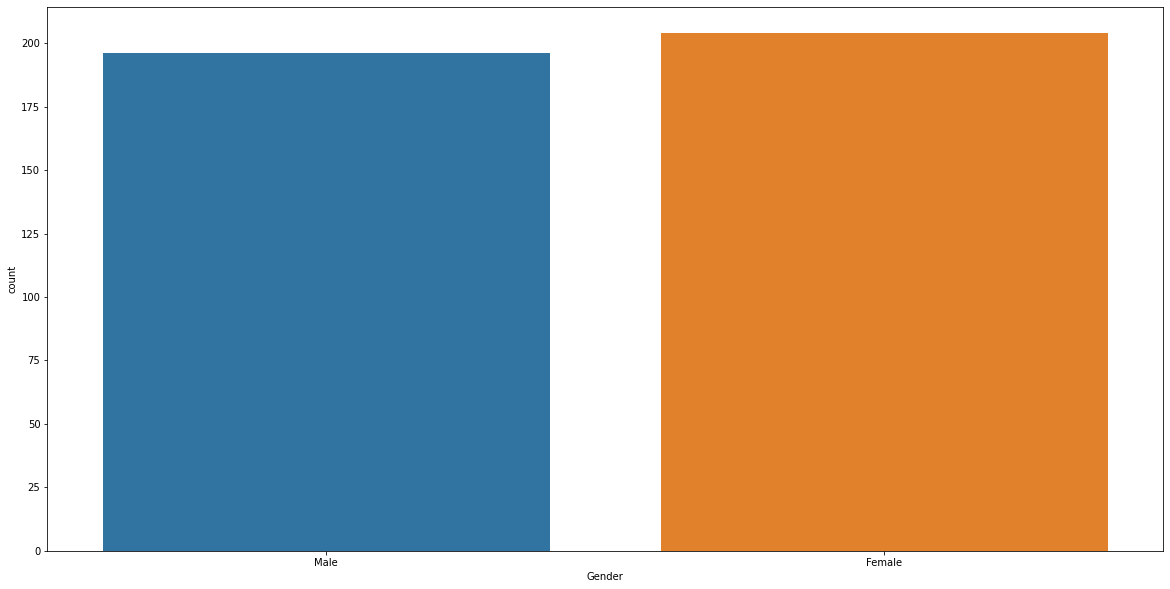

In [ ]:
sns.countplot(x=data["Gender"])
plt.show()

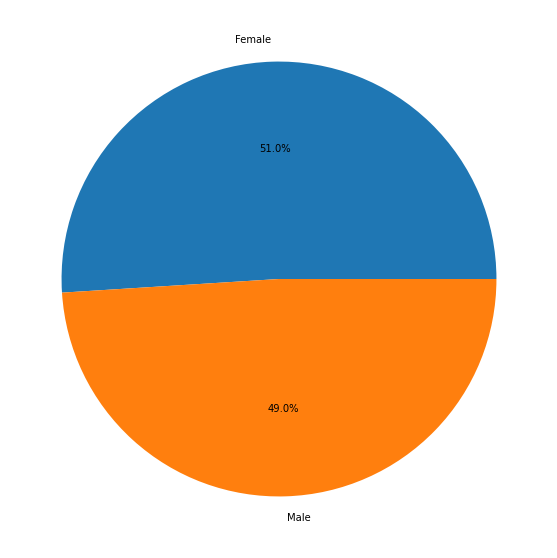

In [ ]:
pie=data['Gender'].value_counts()
pie_index=pie.index
pie_val=pie.values
fig=plt.pie(x=pie_val,labels=("Female","Male"),autopct='%1.1f%%')

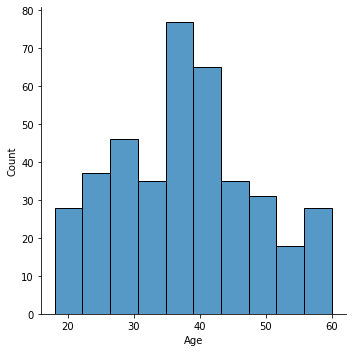

In [ ]:
sns.displot(data, x="Age",bins=10)

In [ ]:
data["Age"].max()

60

In [ ]:
data["Age"].min()

18

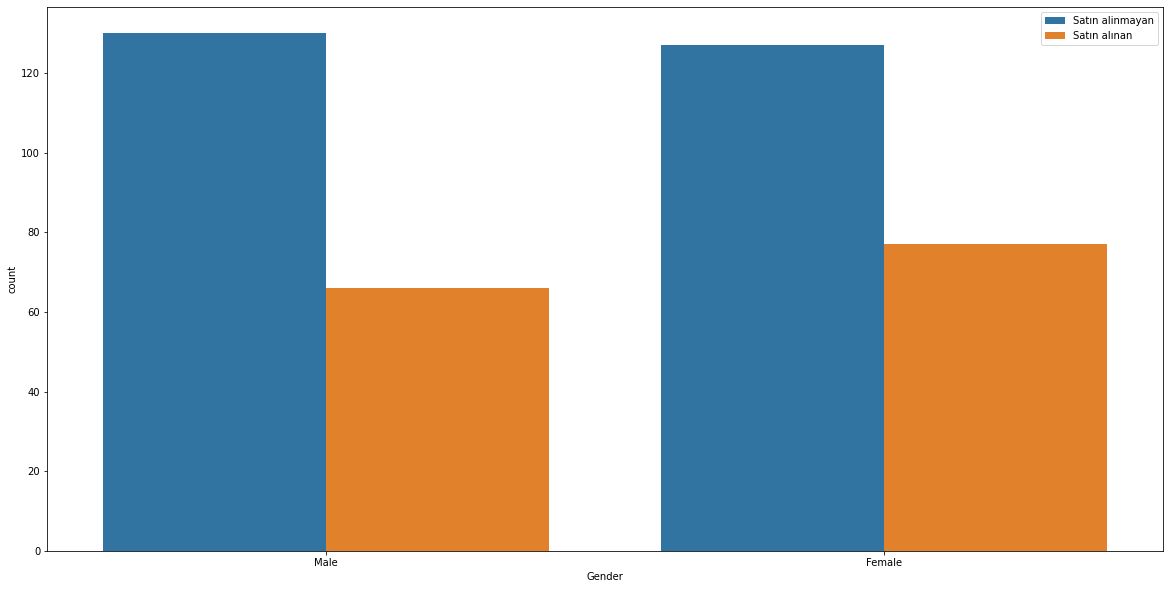

In [ ]:
sns.countplot(x=data["Gender"],hue=data["Purchased"],data=data)
plt.legend(labels=("Satın alinmayan",'Satın alınan'))


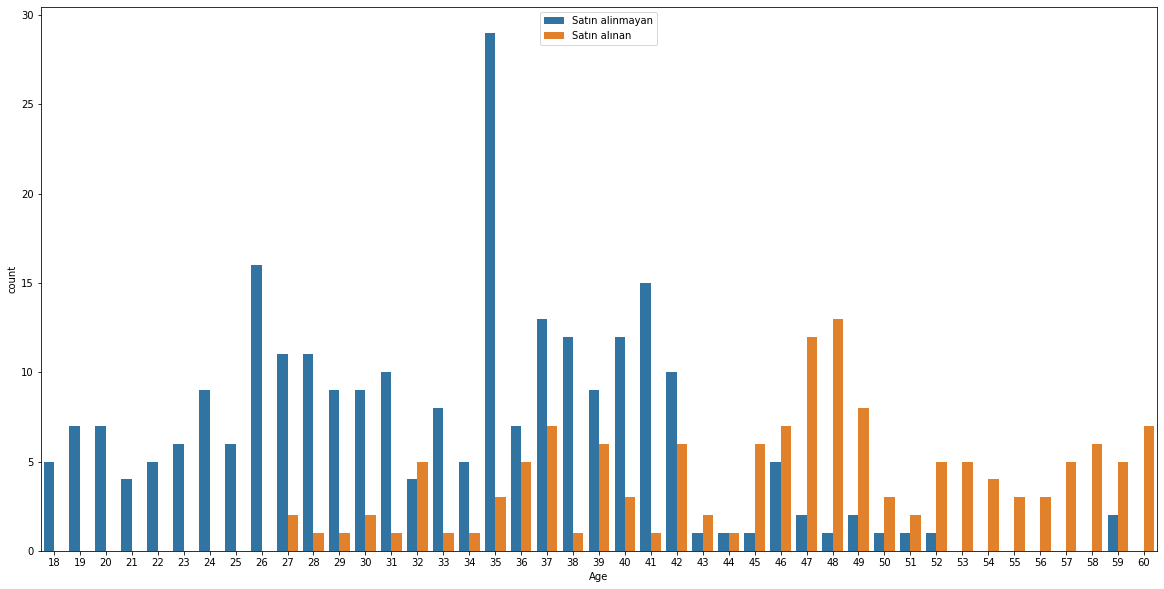

In [ ]:
sns.countplot(x=data["Age"],hue=data["Purchased"],data=data)
plt.legend(labels=("Satın alinmayan",'Satın alınan'))


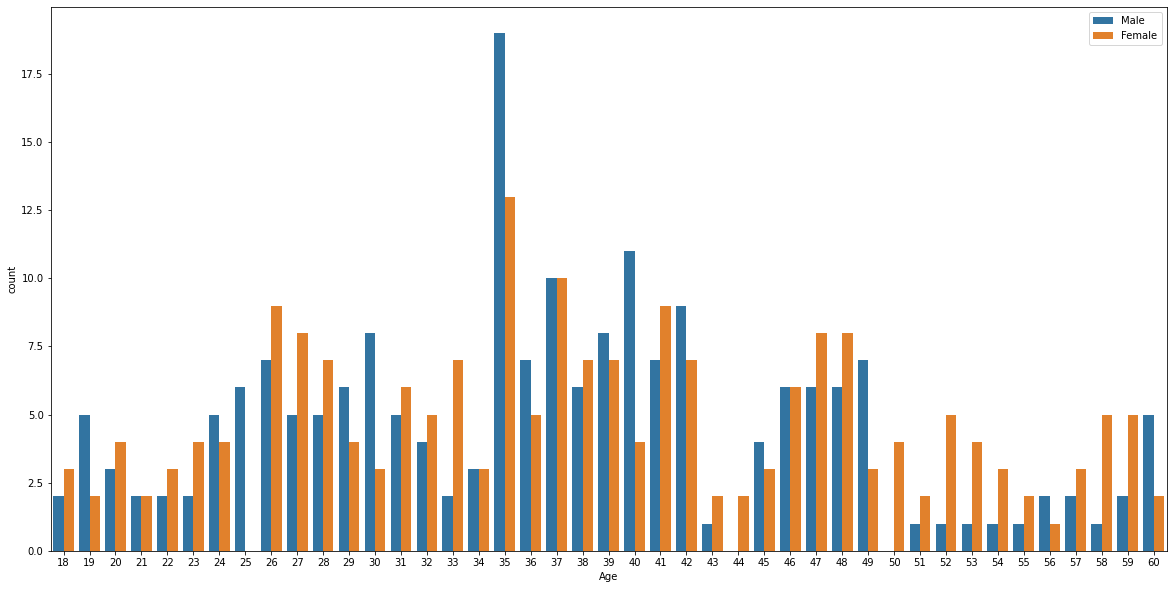

In [ ]:
sns.countplot(x=data["Age"],hue=data["Gender"],data=data)
plt.legend(labels=("Male",'Female'))

In [ ]:
data.EstimatedSalary.value_counts()

72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: EstimatedSalary, Length: 117, dtype: int64

In [ ]:
data.EstimatedSalary.unique()

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  25000,
        26000,  28000,  29000,  22000,  49000,  41000,  23000,  30000,
        74000, 137000,  16000,  44000,  90000,  27000,  72000,  31000,
        17000,  51000, 108000,  15000,  79000,  54000, 135000,  89000,
        32000,  83000,  55000,  48000, 117000,  87000,  66000, 120000,
        63000,  68000, 113000, 112000,  42000,  88000,  62000, 118000,
        85000,  81000,  50000, 116000, 123000,  73000,  37000,  59000,
       149000,  21000,  35000,  71000,  61000,  75000,  53000, 107000,
        96000,  45000,  47000, 100000,  38000,  69000, 148000, 115000,
        34000,  60000,  70000,  36000,  39000, 134000, 101000, 130000,
       114000, 142000,  78000, 143000,  91000, 144000, 102000, 126000,
       133000, 147000, 104000, 146000, 122000,  97000,  95000, 131000,
        77000, 125000, 106000, 141000,  93000, 138000, 119000, 105000,
      

<Figure size 1440x1440 with 0 Axes>

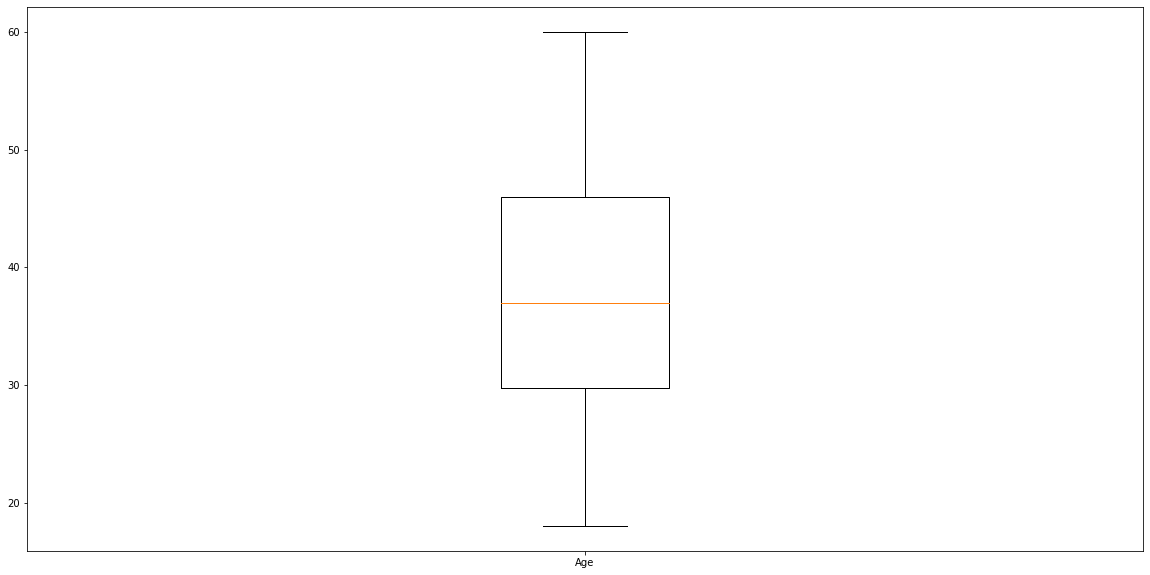

<Figure size 1440x1440 with 0 Axes>

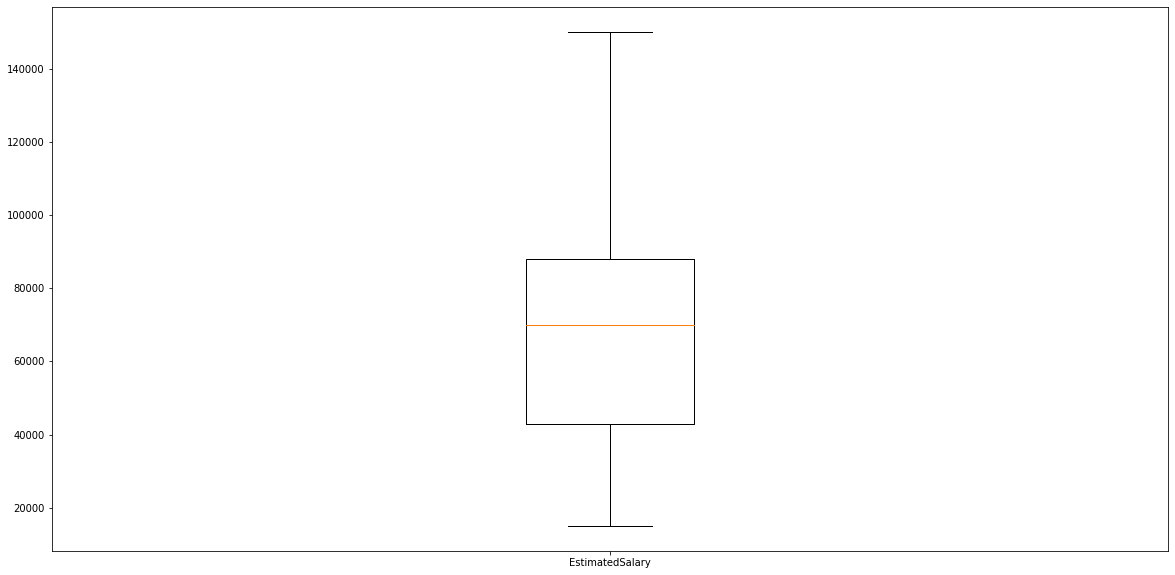

<Figure size 1440x1440 with 0 Axes>

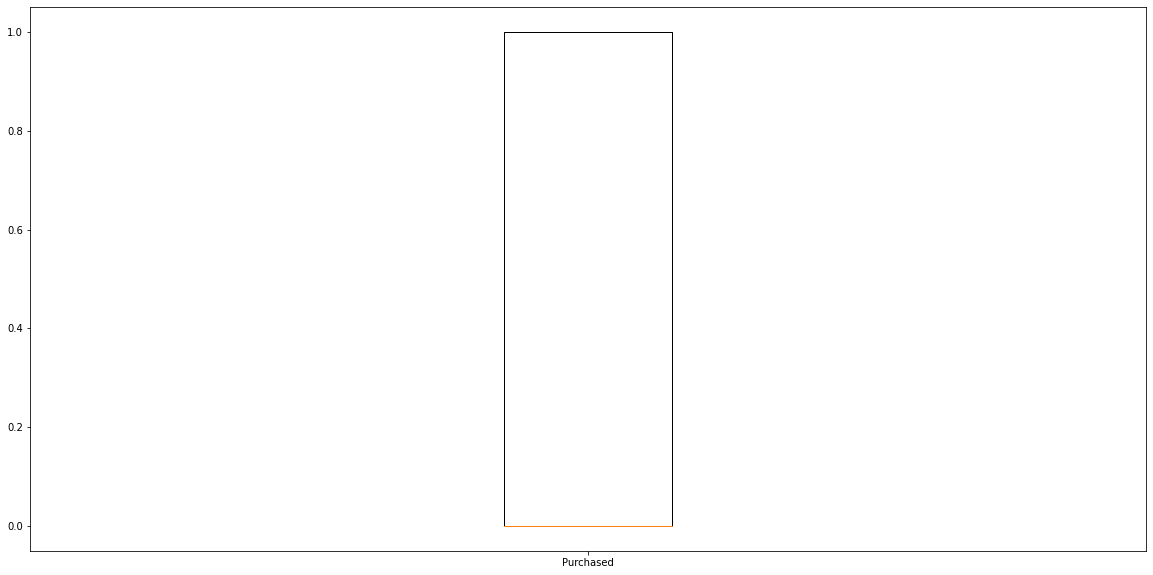

In [ ]:
for i in data_numer:
 plt.figure(figsize=(20, 20))
 fig, ax = plt.subplots()
 red_diamond = dict(markerfacecolor='r', marker='D')
 plt.boxplot(data[i].values, labels=[i], flierprops=red_diamond);
 plt.show()

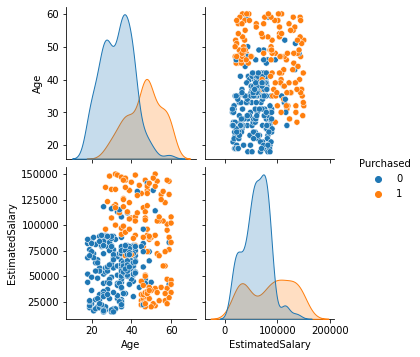

In [ ]:
sns.pairplot(data, hue='Purchased', height=2.5);

In [ ]:
data_numer

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<Figure size 1440x720 with 0 Axes>

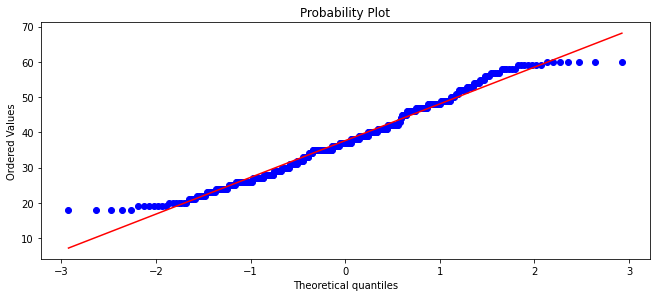

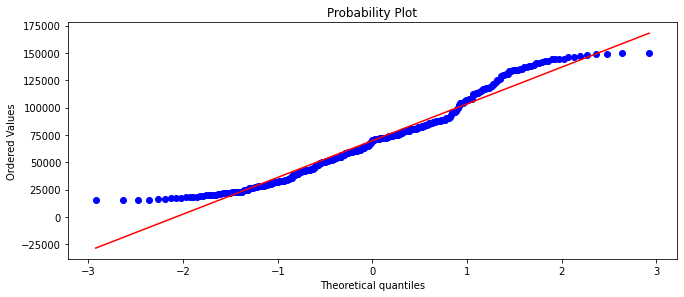

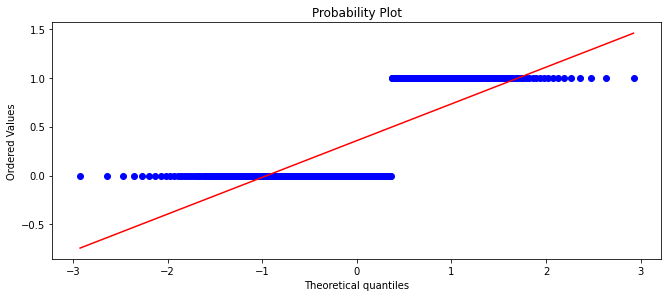

In [ ]:
import scipy.stats as stats# QQ Plot normal datadan ne qeder uzaqlasdigini bildirir
for i, feature in enumerate(data_numer.columns):
  plt.figure(i)
  plt.figure(figsize=(24,20))
  plt.subplot(4, 2, 2)
  plt.title(feature)
  fig = stats.probplot(data_numer[feature], dist="norm", plot=plt)

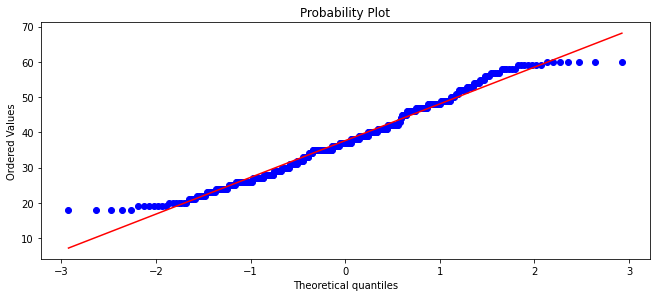

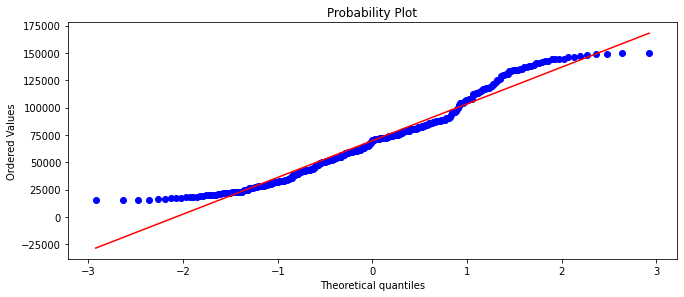

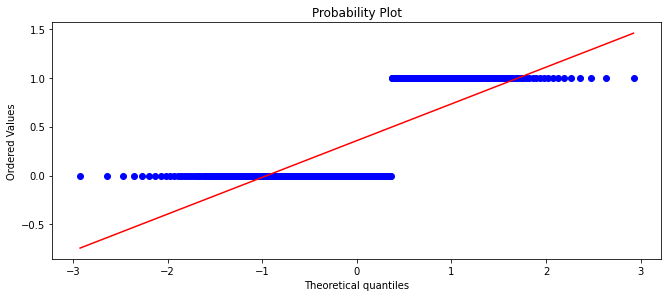

In [ ]:
import scipy.stats as stats
for feature in data_numer:
  plt.figure(figsize=(24,20))
  plt.subplot(4, 2, 2)
  plt.title(feature)
  fig = stats.probplot(data_numer[feature], dist="norm", plot=plt)

In [ ]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Gender']


In [ ]:
s = (data.dtypes =="object")
s


Gender              True
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [ ]:
object_cols = list(s[s].index)
object_cols

['Gender']

In [ ]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
label_data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [ ]:
X = data.drop(['Purchased'], axis=1) # Purchased sütunudan başqa digər sütunları X dəyişəninə mənimsədirik

In [ ]:
X.shape

(400, 3)

In [ ]:
y = data['Purchased']

In [ ]:
y.shape

(400,)

In [ ]:
X= label_data.drop(["Purchased"],axis =1)
y= label_data["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
a=[X_train,X_test,y_train,y_test]
for i in a:
  print(i.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [ ]:
pipeline_linear_r=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_decision_t=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])


pipeline_random_f=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipeline_logistic=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",LogisticRegression())])

pipeline_svm=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",SVC())])
pipelines = [pipeline_linear_r, pipeline_decision_t, pipeline_random_f, pipeline_kn, pipeline_xgb,pipeline_logistic,pipeline_svm]
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor",5 : "LogisticRegression",6 : "SCV"}
for pipe in pipelines:
    pipe.fit(X_train, y_train)
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

[19:55:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LinearRegression: -0.370267 
DecisionTree: -0.385387 
RandomForest: -0.314197 
KNeighbors: -0.304107 
[19:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:02

In [ ]:
pipelines = [pipeline_linear_r, pipeline_decision_t, pipeline_random_f, pipeline_kn, pipeline_xgb, pipeline_logistic, pipeline_svm]
for i in pipelines:
  print(i[1],"--  ",round(i.score(X_test, y_test),2)*100,"%")

LinearRegression() --   60.0 %
DecisionTreeRegressor() --   37.0 %
RandomForestRegressor() --   73.0 %
KNeighborsRegressor() --   76.0 %
XGBRegressor() --   77.0 %
LogisticRegression() --   91.0 %
SVC() --   95.0 %


In [ ]:
pipeline_logistic.score(X_test,y_test)

0.9125

In [ ]:
pipeline_logistic.score(X_train,y_train)

0.825

In [ ]:
y_pred = pipeline_decision_t.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.875

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
cf_matrix

array([[53,  5],
       [ 5, 17]])

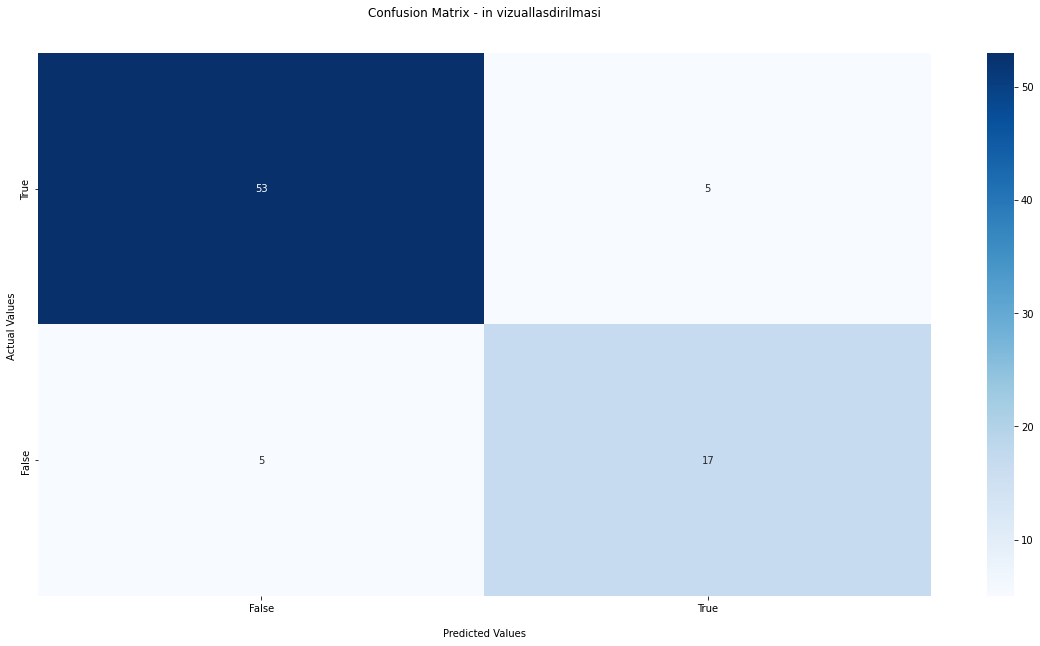

In [ ]:
con = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
con.set_title('Confusion Matrix - in vizuallasdirilmasi\n\n');
con.set_xlabel('\nPredicted Values')
con.set_ylabel('Actual Values ');
con.xaxis.set_ticklabels(['False','True'])
con.yaxis.set_ticklabels(['True','False'])
plt.show()

In [ ]:

data = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
data

,Predicted Positive,Predicted Negative
Actual Positive,53,5
Actual Negative,5,17


In [ ]:
f1_score(y_test,y_pred)

0.7727272727272727

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        58
           1       0.77      0.77      0.77        22

    accuracy                           0.88        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.88      0.88      0.88        80



In [ ]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8346394984326019

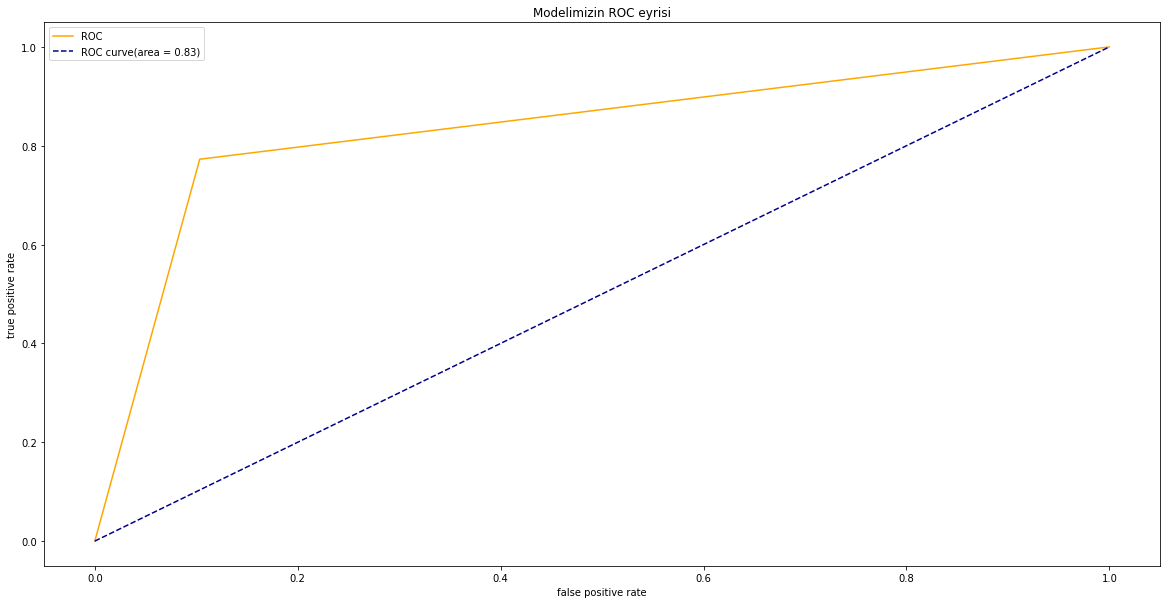

In [ ]:
# Modelin ROC (Receiver Operating Characteristic) əyrisinin qrafikini vizuallaşdıraq
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Modelimizin ROC eyrisi')
plt.legend()
plt.show()

In [ ]:
model=LogisticRegression(penalty='l1',solver='liblinear')

In [ ]:
model.fit(X_train,y_train,)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
model.score(X_test,y_test)

0.925

In [ ]:
model.score(X_train,y_train)

0.821875

In [ ]:
y_pred1 = pipeline_decision_t.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.875

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred1)
cf_matrix

array([[53,  5],
       [ 5, 17]])

In [ ]:
data = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
data

,Predicted Positive,Predicted Negative
Actual Positive,53,5
Actual Negative,5,17


In [ ]:
f1_score(y_test,y_pred)

0.7727272727272727

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        58
           1       0.77      0.77      0.77        22

    accuracy                           0.88        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.88      0.88      0.88        80



399